In [1]:
# Saharnaz Babaei Balderlou 
# Problem Set 3
#------------------------------------------------------------------------------
# Import required packages
#------------------------------------------------------------------------------
import pandas as pd # will be used to read .dta file by .read_stata()
import numpy as np
import matplotlib.pyplot as plt # will be used to see the obvious relationship of desired variables in a scatterplot
#%matplotlib inline
import math # to use in some equations
from scipy.optimize import minimize # for optimization of Likelihood function (MLE method)
import scipy.optimize as opt
import statsmodels.api as statmod 
import scipy.stats as stats

In [2]:
#------------------------------------------------------------------------------
# Read data and prepare to utilize (Part 1 & 2)
#------------------------------------------------------------------------------
df1 = pd.read_stata('PS3_data.dta') 
# My note for later: https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/

In [3]:
print("Dataframe: ")
df1.head()

Dataframe: 


,id68,year,intid,relhh,hannhrs,wannhrs,hlabinc,wlabinc,nochild,wrace,...,redpregovinc,hsex,wsex,age,wage,hpersno,wpersno,hyrsed,wyrsed,pce
0,1,1967,1,Head,1200.0,2000.0,NaN,NaN,0,NaN,...,5614.0,1.0,2.0,52.0,46.0,1.0,2.0,8.0,8.0,0.0
1,2,1967,2,Head,0.0,0.0,NaN,NaN,0,NaN,...,0.0,1.0,2.0,56.0,57.0,1.0,2.0,3.0,3.0,0.0
2,3,1967,3,Head,0.0,0.0,NaN,NaN,0,NaN,...,0.0,1.0,2.0,77.0,64.0,1.0,2.0,NaN,3.0,0.0
3,4,1967,4,Head,1560.0,0.0,NaN,NaN,6,1.0,...,3280.0,1.0,2.0,45.0,44.0,1.0,2.0,8.0,5.0,0.0
4,5,1967,5,Head,2500.0,2000.0,NaN,NaN,3,1.0,...,7900.0,1.0,2.0,24.0,22.0,1.0,2.0,10.0,9.0,0.0


In [4]:
'''
hlabinc = annual labor income of the head
hannhrs = annual hours of the head
hsex = gender of the head (1 = Male, 2 = Female)
hrace = race of the head (1 = white, 2 = Black, 3 = Native American, 4 = Asian/Pacific Islander, 5 = Hispanic, 6,7 = Other)
age = age of the head
hyrsed = years of education of the head
'''
print("Data Statistics:")
df1.describe() 

Data Statistics:


,id68,year,intid,hannhrs,wannhrs,hlabinc,wlabinc,nochild,wrace,hrace,...,redpregovinc,hsex,wsex,age,wage,hpersno,wpersno,hyrsed,wyrsed,pce
count,123786.000000,123786.000000,123786.000000,123786.000000,123786.000000,9.023300e+04,48496.000000,123786.000000,90603.000000,123656.000000,...,1.237860e+05,123786.000000,80758.0,123786.000000,80758.000000,123786.000000,80758.000000,122809.000000,80091.000000,123786.000000
mean,1494.639475,1984.831273,3271.379429,1679.269897,633.026917,4.211505e+04,22026.289062,0.843771,1.098220,1.129731,...,3.012258e+04,1.233072,2.0,45.545547,41.390785,39.620201,55.346169,12.666091,12.720081,0.557690
std,838.901790,9.836212,2277.056058,1061.704712,878.422791,4.670424e+04,21336.107422,1.182829,0.356161,0.394627,...,4.588795e+04,0.422940,0.0,17.623671,14.786721,69.003265,77.864296,2.917721,2.422607,0.265198
min,1.000000,1967.000000,1.000000,0.000000,0.000000,6.353981e-01,1.192780,0.000000,1.000000,1.000000,...,-1.324040e+05,1.000000,2.0,16.000000,13.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,772.000000,1977.000000,1444.000000,832.000000,0.000000,1.979858e+04,8016.247070,0.000000,1.000000,1.000000,...,7.700000e+03,1.000000,2.0,31.000000,29.000000,1.000000,2.000000,12.000000,12.000000,0.362158
50%,1517.000000,1985.000000,2984.000000,1976.000000,0.000000,3.460022e+04,18122.412109,0.000000,1.000000,1.000000,...,1.900000e+04,1.000000,2.0,42.000000,39.000000,3.000000,3.000000,12.000000,12.000000,0.599887
75%,2224.000000,1993.000000,4763.000000,2350.000000,1454.000000,5.267309e+04,30256.060547,2.000000,1.000000,1.000000,...,3.910775e+04,1.000000,2.0,58.000000,51.000000,22.000000,170.000000,15.000000,14.000000,0.786908
max,2930.000000,2002.000000,16968.000000,7800.000000,5840.000000,3.771521e+06,856942.062500,11.000000,8.000000,8.000000,...,3.660000e+06,2.000000,2.0,102.000000,95.000000,227.000000,231.000000,17.000000,17.000000,0.928007


Scatterplot between annual labor inome of the head and years of education of the head


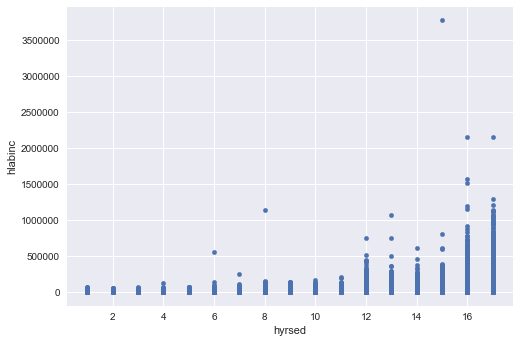

<Figure size 576x396 with 0 Axes>

In [5]:
print("Scatterplot between annual labor inome of the head and years of education of the head")
plt.style.use('seaborn')
df1.plot(x = 'hyrsed', y = 'hlabinc', kind = 'scatter')
plt.show()
plt.savefig('scat_inc_edu.png')

In [6]:
#drop missing values
df1_subset = df1.dropna(how = 'any', subset = ['hlabinc', 'hannhrs', 'hsex', 'hrace', 'age', 'hyrsed'])
df1_subset.describe()

,id68,year,intid,hannhrs,wannhrs,hlabinc,wlabinc,nochild,wrace,hrace,...,redpregovinc,hsex,wsex,age,wage,hpersno,wpersno,hyrsed,wyrsed,pce
count,89688.000000,89688.000000,89688.000000,89688.000000,89688.000000,8.968800e+04,45338.000000,89688.000000,73835.000000,89688.000000,...,8.968800e+04,89688.000000,62705.0,89688.000000,62705.000000,89688.000000,62705.000000,89688.000000,62244.000000,89688.000000
mean,1510.782992,1986.315338,3515.175007,2067.510254,763.457153,4.211382e+04,21914.417969,0.949737,1.096932,1.123695,...,3.774112e+04,1.179935,2.0,40.012321,38.289116,48.742619,65.553192,13.228726,13.029015,0.609756
std,834.667982,8.791094,2314.034043,756.294312,913.115479,4.675834e+04,20676.205078,1.168268,0.354777,0.390376,...,4.853038e+04,0.384065,0.0,13.287443,12.255554,73.709778,81.090965,2.526992,2.225578,0.208654
min,1.000000,1971.000000,1.000000,0.000000,0.000000,6.353981e-01,1.192780,0.000000,1.000000,1.000000,...,-9.359900e+04,1.000000,2.0,17.000000,14.000000,1.000000,1.000000,1.000000,1.000000,0.247121
25%,783.000000,1979.000000,1673.000000,1800.000000,0.000000,1.976367e+04,8042.066406,0.000000,1.000000,1.000000,...,1.400000e+04,1.000000,2.0,29.000000,29.000000,1.000000,2.000000,12.000000,12.000000,0.421747
50%,1542.000000,1986.000000,3321.000000,2064.000000,74.000000,3.460022e+04,18120.386719,0.000000,1.000000,1.000000,...,2.640000e+04,1.000000,2.0,38.000000,36.000000,4.000000,4.000000,12.000000,12.000000,0.614522
75%,2240.000000,1993.000000,5058.000000,2453.000000,1700.000000,5.267309e+04,30172.169922,2.000000,1.000000,1.000000,...,4.744325e+04,1.000000,2.0,49.000000,46.000000,170.000000,170.000000,16.000000,15.000000,0.786908
max,2930.000000,2002.000000,16968.000000,7800.000000,5840.000000,3.771521e+06,685266.750000,11.000000,8.000000,3.000000,...,3.660000e+06,2.000000,2.0,95.000000,93.000000,227.000000,231.000000,17.000000,17.000000,0.928007


In [7]:
# select male heads of HH whose age is between 25 & 60 (included!), and wage > $7/hr
df2 = df1_subset[['id68', 'year', 'intid', 'hlabinc', 'hannhrs', 'hsex', 'hrace', 'age', 'hyrsed']]
df2['annhrs'] = df2['hannhrs'].where(df2['hannhrs']>0)
df2['hrwage'] = df2['hlabinc']/df2['annhrs'] # compute hourly wage
df2 = df2[(df2.hsex == 1.0) & (df2.age >= 25) & (df2.age <= 60) & (df2.hrwage > 7)] #Part 1
df2['ln_hrwage'] = np.log(df2['hrwage']) #log of wages
df2.describe()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,id68,year,intid,hlabinc,hannhrs,hsex,hrace,age,hyrsed,annhrs,hrwage,ln_hrwage
count,57062.000000,57062.000000,57062.000000,5.706200e+04,57062.000000,57062.0,57062.000000,57062.000000,57062.000000,57062.000000,57062.000000,57062.000000
mean,1507.470558,1986.575672,3480.375311,5.282805e+04,2228.557617,1.0,1.101416,39.243629,13.529967,2228.557617,24.320921,3.010804
std,828.361439,8.712311,2253.229068,5.236477e+04,620.054077,0.0,0.369015,9.578858,2.450013,620.054077,25.209909,0.544096
min,1.000000,1971.000000,1.000000,1.666980e+01,2.000000,1.0,1.000000,25.000000,1.000000,2.000000,7.000252,1.945946
25%,782.000000,1979.000000,1690.000000,3.037345e+04,1952.000000,1.0,1.000000,31.000000,12.000000,1952.000000,13.950662,2.635527
50%,1542.000000,1987.000000,3296.000000,4.382858e+04,2160.000000,1.0,1.000000,38.000000,13.000000,2160.000000,19.914677,2.991457
75%,2225.000000,1994.000000,5002.000000,6.138495e+04,2519.000000,1.0,1.000000,47.000000,16.000000,2519.000000,27.790929,3.324710
max,2930.000000,2002.000000,16968.000000,3.771521e+06,5840.000000,1.0,3.000000,60.000000,17.000000,5840.000000,1717.330322,7.448526


In [8]:
# This is a note for me: https://stackoverflow.com/questions/11587782/creating-dummy-variables-in-pandas-for-python
race_dummy = pd.get_dummies(df2['hrace']) # Defining race dummies (There is no Hispanic individual in dataset)
df2['constant'] = 1
data = pd.concat([df2, race_dummy], axis = 1) 
data.rename(columns = {1.0: 'White', 2.0: 'Black', 3.0: 'Others'}, inplace = True) #final data "data"; ready to estimate model 
data.head()

,id68,year,intid,hlabinc,hannhrs,hsex,hrace,age,hyrsed,annhrs,hrwage,ln_hrwage,constant,White,Black,Others
11161,402,1971,1,62928.707031,1523.0,1.0,1.0,51.0,12.0,1523.0,41.318916,3.721320,1,1,0,0
11164,461,1971,4,22660.970703,2010.0,1.0,1.0,55.0,5.0,2010.0,11.274115,2.422509,1,1,0,0
11166,1126,1971,8,29337.865234,2860.0,1.0,1.0,25.0,16.0,2860.0,10.257995,2.328057,1,1,0,0
11173,284,1971,20,76885.437500,2400.0,1.0,1.0,39.0,16.0,2400.0,32.035599,3.466848,1,1,0,0
11175,50,1971,29,31968.156250,3164.0,1.0,1.0,36.0,12.0,3164.0,10.103716,2.312903,1,1,0,0


In [9]:
data.dtypes

id68           int16
year           int16
intid          int16
hlabinc      float32
hannhrs      float32
hsex         float32
hrace        float64
age          float32
hyrsed       float32
annhrs       float32
hrwage       float32
ln_hrwage    float32
constant       int64
White          uint8
Black          uint8
Others         uint8
dtype: object

In [10]:
np.save("data", data)

# Separate years for estimation
data1971 = data[data['year'] == 1971]
np.save("data1971", data1971)
data1980 = data[data['year'] == 1980]
np.save("data1980", data1980)
data1990 = data[data['year'] == 1990]
np.save("data1990", data1990)
data2000 = data[data['year'] == 2000]
np.save("data2000", data2000)

In [11]:
#------------------------------------------------------------------------------
# ML estimation (Part 3)
#------------------------------------------------------------------------------
'''
ln(w_it) = alpha + beta_1 * Educ_it + beta_2 * Age_it + beta_3 * Black_it + beta_4 * Hispanic_it + beta_5 * OtherRace_it + epsilon_it
w_it = wage of individual i in survey year t
Educ_it = education in years
Age_it = age in years
Black_it, Hispanic_it, OtherRace_it = dummy variables for race = Black, Hispanic, Not (belongs to {White, Black, Hispanic})
'''

# Define my objective function
def myLL(params, t): 
    # Coeff.s
    beta0, beta1, beta2, beta3, beta4, sigma = params
    beta = np.array([beta0, beta1, beta2, beta3, beta4])
    n = len(t)
    # Independent variables matrix (No Hispanic)
    x0 = np.array(t['constant']).astype('float')
    x1 = np.array(t['hyrsed']).astype('float')
    x2 = np.array(t['age']).astype('float')
    x3 = np.array(t['Black']).astype('float')
    x4 = np.array(t['Others']).astype('float')
    X = np.column_stack((x0, x1, x2, x3, x4))
    # Dependent variable matrix
    y = np.array(t['ln_hrwage']).astype('float')
    y_bar = np.dot(X, beta)
    ll = (-(n/2)*np.log(2*np.pi) - (n/2)*np.log(sigma**2) - (1/(2*sigma**2))*((y-y_bar).T @ (y - y_bar)))
    return (-ll)


In [13]:
# MLE; 'Nelder-Mead'
nbeta = 5
beta = np.zeros(nbeta)
beta0 = 0.1
beta1 = 0.1
beta2 = 0.1
beta3 = 0.1
beta4 = 0.1
sigma = 0.1
beta = [beta0, beta1, beta2, beta3, beta4]
params = [beta0, beta1, beta2, beta3, beta4, sigma]

bounds = ((1e-10, None), (None,None), (None,None), (None,None), (None,None), (None,None))

res_NM = opt.minimize(myLL, params, args=(data), method='Nelder-Mead', bounds=bounds)
print("MLE coefficients: ", "Total dataset")
print("=============================")
print(res_NM)
print("_____________________________________")
res71_NM = opt.minimize(myLL, params, args=(data1971), method='Nelder-Mead', bounds=bounds)
print("MLE coefficients: ", "year == 1971")
print("=============================")
print(res71_NM)
print("_____________________________________")
res80_NM = opt.minimize(myLL, params, args=(data1980), method='Nelder-Mead', bounds=bounds)
print("MLE coefficients: ", "year == 1980")
print("=============================")
print(res80_NM)
print("_____________________________________")
res90_NM = opt.minimize(myLL, params, args=(data1990), method='Nelder-Mead', bounds=bounds)
print("MLE coefficients: ", "year == 1990")
print("=============================")
print(res90_NM)
print("_____________________________________")
res2000_NM = opt.minimize(myLL, params, args=(data2000), method='Nelder-Mead', bounds=bounds)
print("MLE coefficients: ", "year == 2000")
print("=============================")
print(res2000_NM)
print("_____________________________________")
'''
years = ["data1971.npy", "data1980.npy", "data1990.npy", "data2000.npy", "data.npy"]
for t in years:
    res_MLE = opt.minimize(myLL, params, args=(t), method='Nelder-Mead', bounds=bounds)
    print("MLE coefficients: ", t)
    print(res_MLE)
    print("_____________________________________")
#### I tried this loop so many times and attempted to troubleshoot but finally I got this error: "string indices must be integers"
'''

MLE coefficients:  Total dataset
 final_simplex: (array([[ 1.39309627,  0.0781139 ,  0.0145177 , -0.16239436,  0.01108259,
         0.48968236],
       [ 1.3930527 ,  0.0781193 ,  0.01451702, -0.1624352 ,  0.01106685,
         0.4896769 ],
       [ 1.39309914,  0.07811356,  0.01451801, -0.16244586,  0.0109965 ,
         0.48968791],
       [ 1.39307198,  0.07811841,  0.01451689, -0.16244504,  0.01111231,
         0.48968793],
       [ 1.39313048,  0.07811415,  0.01451716, -0.16247289,  0.01103884,
         0.48967662],
       [ 1.3930366 ,  0.07812007,  0.01451746, -0.16232213,  0.01103599,
         0.48968893],
       [ 1.39317897,  0.07811236,  0.01451641, -0.16240374,  0.01101757,
         0.48968747]]), array([40225.31420626, 40225.31421319, 40225.31422174, 40225.31422664,
       40225.31424347, 40225.3142488 , 40225.3142569 ]))
           fun: 40225.31420626389
       message: 'Optimization terminated successfully.'
          nfev: 1162
           nit: 749
        status: 0
      

'\nyears = ["data1971.npy", "data1980.npy", "data1990.npy", "data2000.npy", "data.npy"]\nfor t in years:\n    res_MLE = opt.minimize(myLL, params, args=(t), method=\'Nelder-Mead\', bounds=bounds)\n    print("MLE coefficients: ", t)\n    print(res_MLE)\n    print("_____________________________________")\n#### I tried this loop so many times and attempted to troubleshoot but finally I got this error: "string indices must be integers"\n'

In [15]:
# MLE; 'L-BFGS-B'
nbeta = 5
beta = np.zeros(nbeta)
beta0 = 0.1
beta1 = 0.1
beta2 = 0.1
beta3 = 0.1
beta4 = 0.1
sigma = 0.1
beta = [beta0, beta1, beta2, beta3, beta4]
params = [beta0, beta1, beta2, beta3, beta4, sigma]

bounds = ((1e-10, None), (None,None), (None,None), (None,None), (None,None), (None,None))

res_B = opt.minimize(myLL, params, args=(data), method='L-BFGS-B', bounds=bounds)
print("MLE coefficients: ", "Total dataset")
print("=============================")
print(res_B)
print("_____________________________________")
res71_B = opt.minimize(myLL, params, args=(data1971), method='L-BFGS-B', bounds=bounds)
print("MLE coefficients: ", "year == 1971")
print("=============================")
print(res71_B)
print("_____________________________________")
res80_B = opt.minimize(myLL, params, args=(data1980), method='L-BFGS-B', bounds=bounds)
print("MLE coefficients: ", "year == 1980")
print("=============================")
print(res80_B)
print("_____________________________________")
res90_B = opt.minimize(myLL, params, args=(data1990), method='L-BFGS-B', bounds=bounds)
print("MLE coefficients: ", "year == 1990")
print("=============================")
print(res90_B)
print("_____________________________________")
res2000_B = opt.minimize(myLL, params, args=(data2000), method='L-BFGS-B', bounds=bounds)
print("MLE coefficients: ", "year == 2000")
print("=============================")
print(res2000_B)
print("_____________________________________")

MLE coefficients:  Total dataset
      fun: 40225.31422021307
 hess_inv: <6x6 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.09284883, 11.08637662, 13.14037945,  0.50786184, -0.14697434,
        2.48692231])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 469
      nit: 57
   status: 0
  success: True
        x: array([ 1.39310199,  0.07811655,  0.01451693, -0.1623717 ,  0.0110262 ,
        0.48968773])
_____________________________________
MLE coefficients:  year == 1971
      fun: 728.0628698968592
 hess_inv: <6x6 LbfgsInvHessProduct with dtype=float64>
      jac: array([-5.36374500e-02, -4.52814675e-01, -2.12465920e+00,  3.09682946e-02,
       -7.27595761e-04,  9.65997060e-02])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 602
      nit: 76
   status: 0
  success: True
        x: array([ 1.55089935,  0.0668825 ,  0.01439164, -0.16381197,  0.0306993 ,
        0.41010486])
_____________________________________
MLE coeff

In [16]:
# MLE; 'SLSQP'
nbeta = 5
beta = np.zeros(nbeta)
beta0 = 0.1
beta1 = 0.1
beta2 = 0.1
beta3 = 0.1
beta4 = 0.1
sigma = 0.1
beta = [beta0, beta1, beta2, beta3, beta4]
params = [beta0, beta1, beta2, beta3, beta4, sigma]

bounds = ((1e-10, None), (None,None), (None,None), (None,None), (None,None), (None,None))

res_S = opt.minimize(myLL, params, args=(data), method='SLSQP', bounds=bounds)
print("MLE coefficients: ", "Total dataset")
print("=============================")
print(res_S)
print("_____________________________________")
res71_S = opt.minimize(myLL, params, args=(data1971), method='SLSQP', bounds=bounds)
print("MLE coefficients: ", "year == 1971")
print("=============================")
print(res71_S)
print("_____________________________________")
res80_S = opt.minimize(myLL, params, args=(data1980), method='SLSQP', bounds=bounds)
print("MLE coefficients: ", "year == 1980")
print("=============================")
print(res80_S)
print("_____________________________________")
res90_S = opt.minimize(myLL, params, args=(data1990), method='SLSQP', bounds=bounds)
print("MLE coefficients: ", "year == 1990")
print("=============================")
print(res90_S)
print("_____________________________________")
res2000_S = opt.minimize(myLL, params, args=(data2000), method='SLSQP', bounds=bounds)
print("MLE coefficients: ", "year == 2000")
print("=============================")
print(res2000_S)
print("_____________________________________")

MLE coefficients:  Total dataset
     fun: 856650.0116380348
     jac: array([ 0.       , -0.015625 , -0.0625   ,  0.       ,  0.       ,
        0.0390625])
 message: 'Optimization terminated successfully.'
    nfev: 158
     nit: 17
    njev: 17
  status: 0
 success: True
       x: array([ 1.35743523e+04,  4.71150427e+03, -3.11350044e+03, -5.31892140e+02,
       -2.59472257e+02,  1.31954255e+06])
_____________________________________
MLE coefficients:  year == 1971
     fun: 15636.46427784363
     jac: array([-0.00146484, -0.01965332, -0.06494141,  0.        ,  0.        ,
        0.04150391])
 message: 'Optimization terminated successfully.'
    nfev: 237
     nit: 27
    njev: 27
  status: 0
 success: True
       x: array([ 3.27120481e+02, -6.60502420e+01, -1.91283818e+01, -8.28452642e-01,
       -2.05362453e+00,  3.32262081e+04])
_____________________________________
MLE coefficients:  year == 1980
     fun: 21421.229172243915
     jac: array([-0.00170898, -0.02368164, -0.07006836

In [22]:
# OLS 

#https://lectures.quantecon.org/py/ols.html
# to estimate each year separately
res_OLS = statmod.OLS(endog=data['ln_hrwage'], exog=data[['constant', 'hyrsed', 'age', 'Black', 'Others']]).fit()
res71_OLS = statmod.OLS(endog=data1971['ln_hrwage'], exog=data1971[['constant', 'hyrsed', 'age', 'Black', 'Others']]).fit()
res80_OLS = statmod.OLS(endog=data1980['ln_hrwage'], exog=data1980[['constant', 'hyrsed', 'age', 'Black', 'Others']]).fit()
res90_OLS = statmod.OLS(endog=data1990['ln_hrwage'], exog=data1990[['constant', 'hyrsed', 'age', 'Black', 'Others']]).fit()
res2000_OLS = statmod.OLS(endog=data2000['ln_hrwage'], exog=data2000[['constant', 'hyrsed', 'age', 'Black', 'Others']]).fit()

print('OLS; Full Sample')
print('===================')
print(res_OLS.summary())
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('OLS; year == 1971')
print('===================')
print(res71_OLS.summary())
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('OLS; year == 1980')
print('===================')
print(res80_OLS.summary())
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('OLS; year == 1990')
print('===================')
print(res90_OLS.summary())
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('OLS; year == 2000')
print('===================')
print(res2000_OLS.summary())
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
'''
years = ['data1971.npy', 'data1980.npy', 'data1990.npy', 'data2000.npy', 'data.npy']
for t in years:
    print('OLS for', t)
    print('===================')
    print(statmod.OLS(endog=t['ln_hrwage'], exog=t[['constant', 'hyrsed', 'age', 'Black', 'Others']]).fit().summary())
    print('_______________________________________________________________________________________________')
'''

OLS; Full Sample
                            OLS Regression Results                            
Dep. Variable:              ln_hrwage   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     3346.
Date:                Sat, 28 Sep 2019   Prob (F-statistic):               0.00
Time:                        16:57:50   Log-Likelihood:                -40225.
No. Observations:               57062   AIC:                         8.046e+04
Df Residuals:                   57057   BIC:                         8.051e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant       1.3930      0.015   

"\nyears = ['data1971.npy', 'data1980.npy', 'data1990.npy', 'data2000.npy', 'data.npy']\nfor t in years:\n    print('OLS for', t)\n    print('===================')\n    print(statmod.OLS(endog=t['ln_hrwage'], exog=t[['constant', 'hyrsed', 'age', 'Black', 'Others']]).fit().summary())\n    print('_______________________________________________________________________________________________')\n"

# ---------------------------------
# Interpretation (Part 4)
# ---------------------------------
To answer this question that how the returns to education change over time in these data, we can note that it is increasing. The results for OLS estimation in the full sample indicate that 1 unit increase in the years of education of males will result in a 7.8 % increase in logarithm of their wage. Using data for 1971, we can see that this increase in the wage is as much as 6.7% as a result of each year of increased education for the male heads. We can also see that the percentage of increase in the log of wages is 6.8%, 9.8%, & 11% for 1980, 1990, and 2000, respectively, after one more year of education. 

In addition, I estimated the same linear model using the maximum likelihood model and the estimated coefficients for the education are 7.8, 6.97, 6.7, 11.8, 10.9 percent for the full sample, 1971 sample of the data, 1980, 1990 and 2000 samples, respectively which supports the estimation of the model using OLS both in magnitude and signature. MLE method can be estimated using several optimization methods for the likelihood function. After using Nelder-Mead method and gaining aforementioned estimations, we used bounded L-BFGS-B and SLSQP methods. The former estimates the coefficients of the education as 7.8, 6.7, 6.7, 9.7, and 10.9 % for the full dataset, 1971, 1980, 1990, 2000 datasets respectively which is againg very close the estimations of the model using OLS methodology. But the latter estimated far away coefficients for the provided samples of the data. 